<a href="https://colab.research.google.com/github/shahidul56/prores/blob/master/proSR_super_resulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/shahidul56/prores.git

Cloning into 'prores'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 974 (delta 1), reused 5 (delta 1), pack-reused 966
Receiving objects: 100% (974/974), 1.09 MiB | 9.66 MiB/s, done.
Resolving deltas: 100% (580/580), done.


In [0]:
cd prores/data

/content/prores/data


In [0]:
%%writefile get_data.sh


#! /bin/bash

DATADIR="$( cd "$( dirname "${BASH_SOURCE[0]}" )" && pwd )"
mkdir -p $DATADIR/datasets $DATADIR/checkpoints

##################################
# Pretrained Models
##################################

# ProSRs
wget https://www.dropbox.com/s/ldv397lcr3vn95w/proSRs.zip?dl=0 -O /tmp/proSRs.zip
unzip -j /tmp/proSRs.zip -d $DATADIR/checkpoints && rm /tmp/proSRs.zip

# ProSR
wget https://www.dropbox.com/s/3fjp5dd70wuuixl/proSR.zip?dl=0 -O /tmp/proSR.zip
unzip -j /tmp/proSR.zip -d $DATADIR/checkpoints && rm /tmp/proSR.zip

# ProSRGAN
wget https://www.dropbox.com/s/ulkvm4yt5v3vxd8/proSRGAN.zip?dl=0 -O /tmp/proSRGAN.zip
unzip -j /tmp/proSRGAN.zip -d $DATADIR/checkpoints && rm /tmp/proSRGAN.zip

###################################
## Datasets
###################################

## DIV2K
# mkdir -p $DATADIR/datasets/DIV2K
# wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip -P /tmp
# wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_HR.zip -P /tmp
# unzip /tmp/DIV2K_train_HR.zip -d $DATADIR/datasets/DIV2K
# unzip /tmp/DIV2K_valid_HR.zip -d $DATADIR/datasets/DIV2K
# rm /tmp/DIV2K_train_HR.zip
# rm /tmp/DIV2K_valid_HR.zip

# wget https://www.dropbox.com/s/uvwtxy5hul90hyl/DIV2KX8.zip?dl=0 -O /tmp/DIV2KX8.zip
# unzip /tmp/DIV2KX8.zip -d $DATADIR/datasets/DIV2K
# rm /tmp/DIV2KX8.zip

# wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X4.zip -P /tmp
# wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_LR_bicubic_X4.zip -P /tmp
# wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X2.zip -P /tmp
# wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_LR_bicubic_X2.zip -P /tmp

# unzip /tmp/DIV2K_train_LR_bicubic_X2.zip -d $DATADIR/datasets/DIV2K
# unzip /tmp/DIV2K_valid_LR_bicubic_X2.zip -d $DATADIR/datasets/DIV2K
# unzip /tmp/DIV2K_train_LR_bicubic_X4.zip -d $DATADIR/datasets/DIV2K
# unzip /tmp/DIV2K_valid_LR_bicubic_X4.zip -d $DATADIR/datasets/DIV2K

# rm /tmp/DIV2K_train_LR_bicubic_X4.zip
# rm /tmp/DIV2K_valid_LR_bicubic_X4.zip
# rm /tmp/DIV2K_train_LR_bicubic_X2.zip
# rm /tmp/DIV2K_valid_LR_bicubic_X2.zip

# Flickr2K
# wget http://cv.snu.ac.kr/research/EDSR/Flickr2K.tar -P /tmp
# tar -xvf /tmp/Flickr2K.tar -C $DATADIR/datasets/
# rm -rf /tmp/Flickr2K.tar

# Set14, Urban100, BSD100
wget https://cv.snu.ac.kr/research/EDSR/benchmark.tar -P /tmp
tar -xvf /tmp/benchmark.tar -C /tmp && mv /tmp/benchmark/* $DATADIR/datasets
rm -rf /tmp/benchmark /tmp/benchmark.tar


Overwriting get_data.sh


In [0]:
cd ..

/content/prores


In [0]:
!wget -c https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
!chmod +x Anaconda3-5.1.0-Linux-x86_64.sh
!bash ./Anaconda3-5.1.0-Linux-x86_64.sh -b -f -p /usr/local
!conda install -y --prefix /usr/local -c <<<your wish>>>>

import sys
sys.path.append('/usr/local/lib/python3.6/site-packages/')

--2018-12-05 12:07:35--  https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.16.18.10, 104.16.19.10, 2606:4700::6810:120a, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.16.18.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 577996269 (551M) [application/x-sh]
Saving to: ‘Anaconda3-5.1.0-Linux-x86_64.sh’

Anaconda3-5.1.0-Lin 100%[===================>] 551.22M   159MB/s    in 8.4s    

2018-12-05 12:07:44 (65.4 MB/s) - ‘Anaconda3-5.1.0-Linux-x86_64.sh’ saved [577996269/577996269]

PREFIX=/usr/local
installing: python-3.6.4-hc3d631a_1 ...
Python 3.6.4 :: Anaconda, Inc.
installing: ca-certificates-2017.08.26-h1d4fec5_0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: intel-openmp-2018.0.0-hc7b2577_8 ...
installing: libgcc-ng-7.2.0-h7cc24e2_2 ...
installing: libgfortran-ng-7.2.0-h9f7466a_2 ...
installing: libstdcxx-ng-7.2.0-h7a57d05_2 ...
installing: bzip2-1.0.6-h9a117a8_

In [0]:
!conda env list

# conda environments:
#
base                  *  /usr/local



In [0]:
!conda create -n proSR

Solving environment: - done


==> WARNING: A newer version of conda exists. <==
  current version: 4.4.10
  latest version: 4.5.11

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /usr/local/envs/proSR


Proceed ([y]/n)? y

Preparing transaction: | done
Verifying transaction: - \ done
Executing transaction: / done
#
# To activate this environment, use:
# > source activate proSR
#
# To deactivate an active environment, use:
# > source deactivate
#



In [0]:
!source activate proSR

In [0]:
!ls

Anaconda3-5.1.0-Linux-x86_64.sh  docs	  options  README.md  tools
data				 LICENSE  prosr    test.py    train.py


In [0]:
!rm Anaconda3-5.1.0-Linux-x86_64.sh

In [0]:
!conda install pytorch=0.4.0 torchvision cuda91 -c pytorch

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.4.10
  latest version: 4.5.11

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - cuda91
    - pytorch=0.4.0
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2018.10.15         |           py36_0         139 KB
    ninja-1.8.2                |   py36h6bb024c_1         1.3 MB
    ca-certificates-2018.03.07 |                0         124 KB
    blas

In [0]:
!pip freeze

alabaster==0.7.10
anaconda-client==1.6.9
anaconda-navigator==1.7.0
anaconda-project==0.8.2
asn1crypto==0.24.0
astroid==1.6.1
astropy==2.0.3
attrs==17.4.0
Babel==2.5.3
backports.shutil-get-terminal-size==1.0.0
beautifulsoup4==4.6.0
bitarray==0.8.1
bkcharts==0.2
blaze==0.11.3
bleach==2.1.2
bokeh==0.12.13
boto==2.48.0
Bottleneck==1.2.1
certifi==2018.10.15
cffi==1.11.4
chardet==3.0.4
click==6.7
cloudpickle==0.5.2
clyent==1.2.2
colorama==0.3.9
conda==4.4.10
conda-build==3.4.1
conda-verify==2.0.0
contextlib2==0.5.5
cryptography==2.1.4
cycler==0.10.0
Cython==0.27.3
cytoolz==0.9.0
dask==0.16.1
datashape==0.5.4
decorator==4.2.1
distributed==1.20.2
docutils==0.14
entrypoints==0.2.3
et-xmlfile==1.0.1
fastcache==1.0.2
filelock==2.0.13
Flask==0.12.2
Flask-Cors==3.0.3
gevent==1.2.2
glob2==0.6
gmpy2==2.0.8
greenlet==0.4.12
h5py==2.7.1
heapdict==1.0.0
html5lib==1.0.1
idna==2.6
imageio==2.2.0
imagesize==0.7.1
ipykernel==4.8.0
ipython==6.2.1
ipython-genutils==0.2.0
ipywidgets==7.1.1
isort==4.2.15
itsdan

In [0]:
!conda install scikit-image cython

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 4.4.10
  latest version: 4.5.11

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - cython
    - scikit-image


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cy

In [0]:
!conda install visdom dominate -c conda-forge

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

In [0]:
!pip install easydict 

  Running setup.py bdist_wheel for easydict ... - done
  Stored in directory: /root/.cache/pip/wheels/9a/88/ec/085d92753646b0eda1b7df49c7afe51a6ecc496556d3012e2e
Successfully built easydict


In [0]:
!/content/prores/data/get_data.sh

--2018-12-05 12:19:19--  https://www.dropbox.com/s/ldv397lcr3vn95w/proSRs.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ldv397lcr3vn95w/proSRs.zip [following]
--2018-12-05 12:19:19--  https://www.dropbox.com/s/raw/ldv397lcr3vn95w/proSRs.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2b66191ca1a5c84f23c249a606.dl.dropboxusercontent.com/cd/0/inline/AW42esvh2wlamUNTwwgnblTWPtCaWl5n6LdYqAET_tKU4-1y-blOGdmiRG_9ASS7svc_rTelvB157wCQYxjV4eDK9aeDd0KTUBxtpAx-gloi_1W7fW1NlxtCeFFnsEEs0pLUCEhhCGlkfpGxUQXxXCWm1ell-fDG6bXNKl0IcsNF1lZFwa8DGtAVCHLReomiBm2N3ydThCQlohbL8Qdw1-oa/file [following]
--2018-12-05 12:19:20--  https://uc2b66191ca1a5c84f23c249a606.dl.dropboxusercontent.com/cd/0/inline/AW42esvh2wlamUNTwwgnblTWPtCaWl5

In [0]:
!ls

data  docs  LICENSE  options  prosr  README.md	test.py  tools	train.py


In [0]:
cd /content/prores

/content/prores


In [0]:
!mkdir -p src

In [0]:
!mkdir -p outputfolder 

In [0]:
from google.colab import files
uploaded = files.upload()


Saving testman.jpg to testman.jpg


In [0]:
!ls

data  hasina1.jpg  options  README.md  test.py	train.py
docs  LICENSE	   prosr    src        tools


In [0]:
!wget "https://i.ytimg.com/vi/LxI6iY-e60g/maxresdefault.jpg" -O "src/test2.jpg"

--2018-11-12 13:07:29--  https://i.ytimg.com/vi/LxI6iY-e60g/maxresdefault.jpg
Resolving i.ytimg.com (i.ytimg.com)... 74.125.197.119, 74.125.142.119, 74.125.195.119, ...
Connecting to i.ytimg.com (i.ytimg.com)|74.125.197.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44447 (43K) [image/jpeg]
Saving to: ‘src/test2.jpg’

src/test2.jpg       100%[===================>]  43.41K  --.-KB/s    in 0.001s  

2018-11-12 13:07:29 (56.4 MB/s) - ‘src/test2.jpg’ saved [44447/44447]



In [0]:
!python test.py --checkpoint data/checkpoints/proSRGAN_x8.pth --target testman.jpg --output-dir outputfolder --scale 2 

2018-12-05 12:28:26: phase: phase.TEST
2018-12-05 12:28:26: checkpoint: proSRGAN_x8.pth
{'D': {'act_params': {'negative_slope': 0.2},
       'act_type': 'LRELU',
       'input_residual': True,
       'ndf': 64,
       'scale_overhead': True,
       'update_freq': 2,
       'use_lsgan': True,
       'warmup_epochs': 0,
       'which_epoch': 'latest',
       'which_model_netD': 'srgan'},
 'G': {'bn_size': 4,
       'growth_rate': 40,
       'level_compression': -1,
       'level_config': [[8, 8, 8, 8, 8, 8, 8, 8, 8], [8, 8, 8], [8]],
       'max_num_feature': 312,
       'max_scale': 8,
       'num_init_features': 160,
       'ps_woReLU': False,
       'res_factor': 0.2,
       'residual_denseblock': True,
       'vgg': [2, 4],
       'vgg_mean_pool': True},
 'data': {'input_size': [48, 36, 24], 'scale': [2, 4, 8]},
 'test': {'dataset': {'downscale': False,
                      'path': {'source': '', 'target': 'data/datasets/Set14'},
                      'stddev': [0.0039215, 0.0039215

In [0]:
cd outputfolder

/content/prores/outputfolder


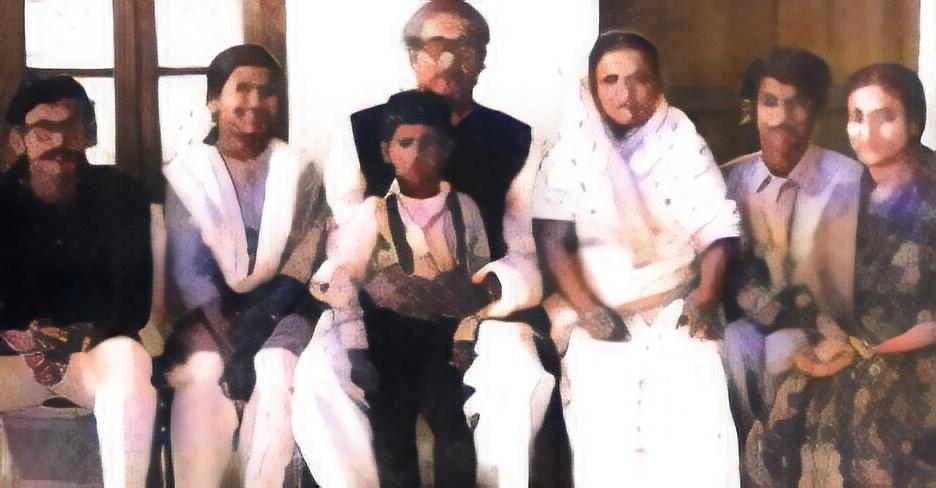

In [0]:
from IPython.display import Image
Image('hasina1.jpg')

In [0]:
cd ..

/content/prores


In [0]:
!ls /content/prores/data/checkpoints/

proSRGAN_x4.pth  proSR.pth   proSRs_x2.pth  proSRs_x8.pth  proSR_x4.pth
proSRGAN_x8.pth  proSRs.pth  proSRs_x4.pth  proSR_x2.pth   proSR_x8.pth
